In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
bankrup = pd.read_csv('Qualitative_Bankruptcy.data.txt')
bankrup

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB
...,...,...,...,...,...,...,...
244,N,N,A,N,N,N,B
245,P,N,N,N,N,N,B
246,A,N,N,N,N,N,B
247,N,N,N,N,N,N,B


In [5]:
bankrup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P       249 non-null    object
 1   P.1     249 non-null    object
 2   A       249 non-null    object
 3   A.1     249 non-null    object
 4   A.2     249 non-null    object
 5   P.2     249 non-null    object
 6   NB      249 non-null    object
dtypes: object(7)
memory usage: 13.7+ KB


In [6]:
bankrup.describe()

,P,P.1,A,A.1,A.2,P.2,NB
count,249,249,249,249,249,249,249
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,142


In [7]:
bankrup.isna().sum()

P      0
P.1    0
A      0
A.1    0
A.2    0
P.2    0
NB     0
dtype: int64

In [10]:
bankru = bankrup.rename(columns={"P":"Indus_Risk", "P.1":"Mgt_Risk", "A":"Fin_Flex", "A.1":"Credib", "A.2":"Competi", "P.2":"Operat_Risk", "NB":"Class"})
bankru

,Indus_Risk,Mgt_Risk,Fin_Flex,Credib,Competi,Operat_Risk,Class
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB
...,...,...,...,...,...,...,...
244,N,N,A,N,N,N,B
245,P,N,N,N,N,N,B
246,A,N,N,N,N,N,B
247,N,N,N,N,N,N,B


In [14]:
enc = OrdinalEncoder()
bankru[['indus_risk', 'mgt_risk', 'fin_flex', 'credib', 'competi', 'operat_risk']] = enc.fit_transform(bankru[['Indus_Risk', 'Mgt_Risk', 'Fin_Flex', 'Credib', 'Competi', 'Operat_Risk']]) 
bankru

,Indus_Risk,Mgt_Risk,Fin_Flex,Credib,Competi,Operat_Risk,Class,indus_risk,mgt_risk,fin_flex,credib,competi,operat_risk
0,N,N,A,A,A,N,NB,1.0,1.0,0.0,0.0,0.0,1.0
1,A,A,A,A,A,A,NB,0.0,0.0,0.0,0.0,0.0,0.0
2,P,P,P,P,P,P,NB,2.0,2.0,2.0,2.0,2.0,2.0
3,N,N,P,P,P,N,NB,1.0,1.0,2.0,2.0,2.0,1.0
4,A,A,P,P,P,A,NB,0.0,0.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,N,N,A,N,N,N,B,1.0,1.0,0.0,1.0,1.0,1.0
245,P,N,N,N,N,N,B,2.0,1.0,1.0,1.0,1.0,1.0
246,A,N,N,N,N,N,B,0.0,1.0,1.0,1.0,1.0,1.0
247,N,N,N,N,N,N,B,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
bankrupt = bankru.drop(columns =['Indus_Risk', 'Mgt_Risk', 'Fin_Flex', 'Credib', 'Competi', 'Operat_Risk']) 
bankrupt

,Class,indus_risk,mgt_risk,fin_flex,credib,competi,operat_risk
0,NB,1.0,1.0,0.0,0.0,0.0,1.0
1,NB,0.0,0.0,0.0,0.0,0.0,0.0
2,NB,2.0,2.0,2.0,2.0,2.0,2.0
3,NB,1.0,1.0,2.0,2.0,2.0,1.0
4,NB,0.0,0.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...
244,B,1.0,1.0,0.0,1.0,1.0,1.0
245,B,2.0,1.0,1.0,1.0,1.0,1.0
246,B,0.0,1.0,1.0,1.0,1.0,1.0
247,B,1.0,1.0,1.0,1.0,1.0,1.0


In [22]:
lst = []
for change in range(len(bankrupt['Class'])):
    if bankrupt['Class'][change] == 'NB':
        lst.append("Non Bankruptcy")
    else: 
        bankrupt['Class'][change] == 'B'
        lst.append('Bankruptcy')
    
bankrupt['Class'] = lst

In [24]:
bankrupt

,Class,indus_risk,mgt_risk,fin_flex,credib,competi,operat_risk
0,Non Bankruptcy,1.0,1.0,0.0,0.0,0.0,1.0
1,Non Bankruptcy,0.0,0.0,0.0,0.0,0.0,0.0
2,Non Bankruptcy,2.0,2.0,2.0,2.0,2.0,2.0
3,Non Bankruptcy,1.0,1.0,2.0,2.0,2.0,1.0
4,Non Bankruptcy,0.0,0.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...
244,Bankruptcy,1.0,1.0,0.0,1.0,1.0,1.0
245,Bankruptcy,2.0,1.0,1.0,1.0,1.0,1.0
246,Bankruptcy,0.0,1.0,1.0,1.0,1.0,1.0
247,Bankruptcy,1.0,1.0,1.0,1.0,1.0,1.0


Text(0.5, 1.0, 'The graph shows the relationship between the industrial risk and the class')

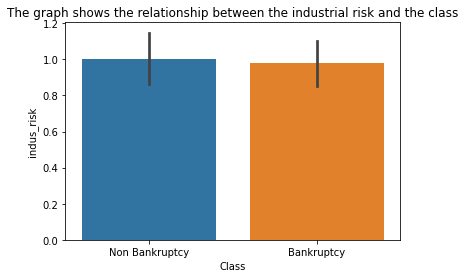

In [30]:
sns.barplot(x="Class", y="indus_risk", data=bankrupt)
plt.title("The graph shows the relationship between the industrial risk and the class")

Text(0.5, 1.0, 'The graph shows the relationship between the management risk and the class.')

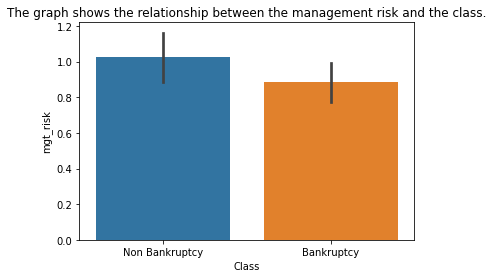

In [37]:
sns.barplot(x="Class", y="mgt_risk", data=bankrupt)
plt.title("The graph shows the relationship between the management risk and the class.")

Text(0.5, 1.0, 'The graph shows the relationship between the financial flexibility and the class.')

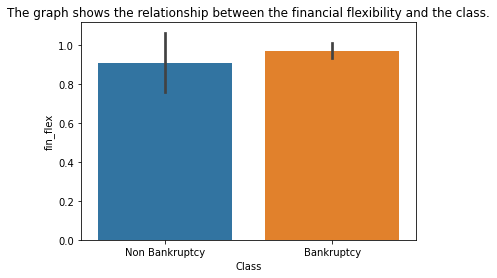

In [36]:
sns.barplot(x="Class", y="fin_flex", data=bankrupt)
plt.title("The graph shows the relationship between the financial flexibility and the class.")

Text(0.5, 1.0, 'The graph shows the relationship between credibility and the class.')

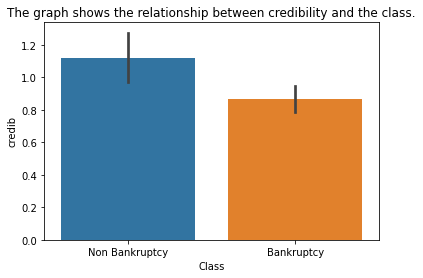

In [35]:
sns.barplot(x="Class", y="credib", data=bankrupt)
plt.title("The graph shows the relationship between credibility and the class.")

Text(0.5, 1.0, 'The graph shows the relationship between competitivenes and the class.')

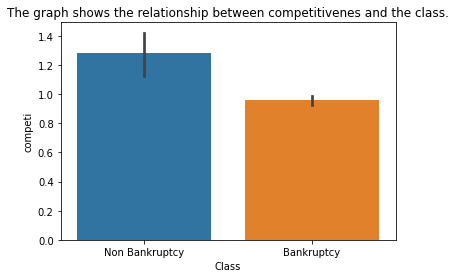

In [38]:
sns.barplot(x="Class", y="competi", data=bankrupt)
plt.title("The graph shows the relationship between competitivenes and the class.")

Text(0.5, 1.0, 'The graph shows the relationship between operational risk and the class.')

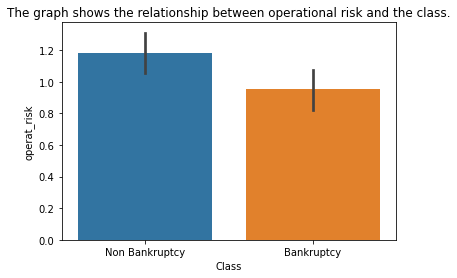

In [39]:
sns.barplot(x="Class", y="operat_risk", data=bankrupt)
plt.title("The graph shows the relationship between operational risk and the class.")

In [40]:
bankrupt.describe()

,indus_risk,mgt_risk,fin_flex,credib,competi,operat_risk
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,0.991968,0.967871,0.935743,1.012048,1.144578,1.084337
std,0.803179,0.723296,0.721143,0.790477,0.753474,0.732948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<AxesSubplot:>

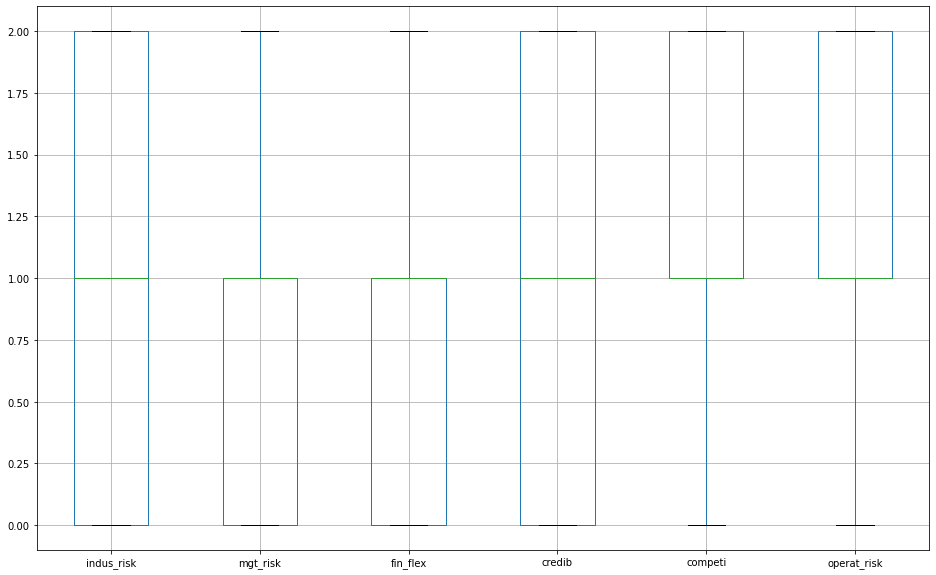

In [41]:
plt.figure(figsize=(16, 10))
bankrupt.boxplot()

In [42]:
y = bankrupt['Class']
X = bankrupt.drop(columns=['Class'])

<AxesSubplot:>

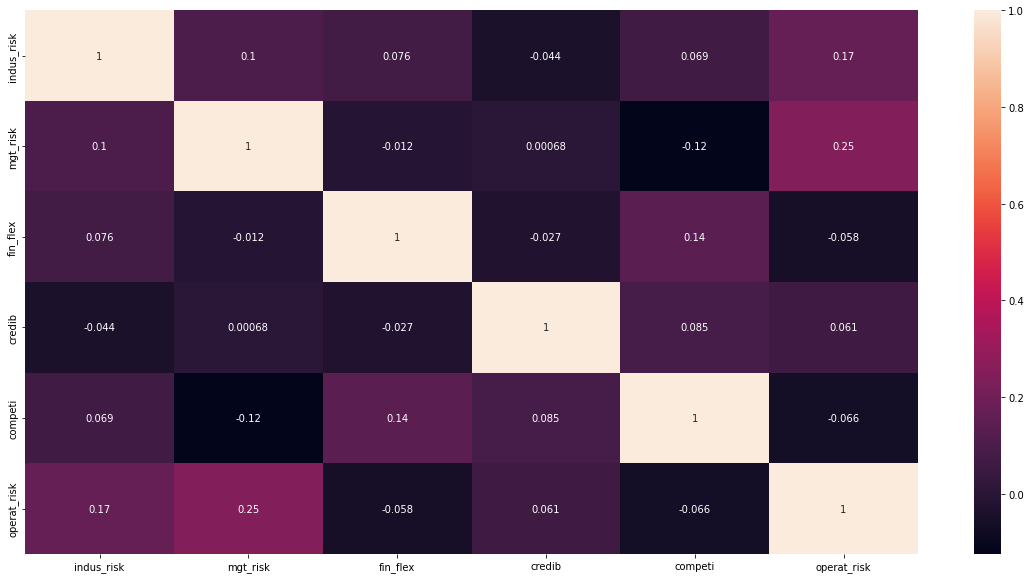

In [43]:
plt.figure(figsize=(20, 10))
sns.heatmap(X.corr(), annot = True)

In [44]:
def calcu_mult(bankrupt):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [47]:
calcu_mult(X)

,variables,VIF
0,indus_risk,2.515326
1,mgt_risk,2.671497
2,fin_flex,2.431737
3,credib,2.349726
4,competi,2.846612
5,operat_risk,3.124592


In [48]:
y = bankrupt['Class']
x = bankrupt.drop(columns=['Class'], axis=1)

In [49]:
y.value_counts()

Non Bankruptcy    142
Bankruptcy        107
Name: Class, dtype: int64

In [52]:
sample = SMOTE(random_state=45)
x,y = sample.fit_resample(x, y)

In [53]:
y.value_counts()

Non Bankruptcy    142
Bankruptcy        142
Name: Class, dtype: int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=45)

In [59]:
Scaler = StandardScaler()
X_train_norm = pd.DataFrame(Scaler.fit_transform(X_train))

X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_train_norm, y_train, test_size=.20, random_state=45)

In [64]:
model = PCA(n_components = 6)
model_ = model.fit(X_train_scale, y_train_scale)

In [66]:
pca = PCA(n_components=6)
model = pca.fit(X_train_scale)
PCA(n_components = 6)
print(model.explained_variance_ratio_)

[0.24470846 0.18482723 0.16896981 0.15015965 0.13348186 0.11785299]


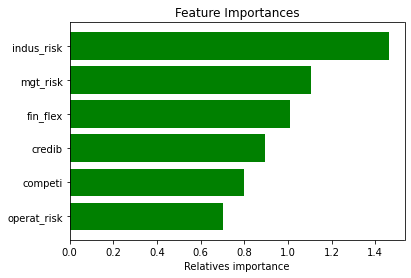

In [68]:
features = x.columns
importances = model_.explained_variance_
indices = np.argsort(importances)[-12:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relatives importance')
plt.show()

Text(0.5, 1.0, 'elbow_method')

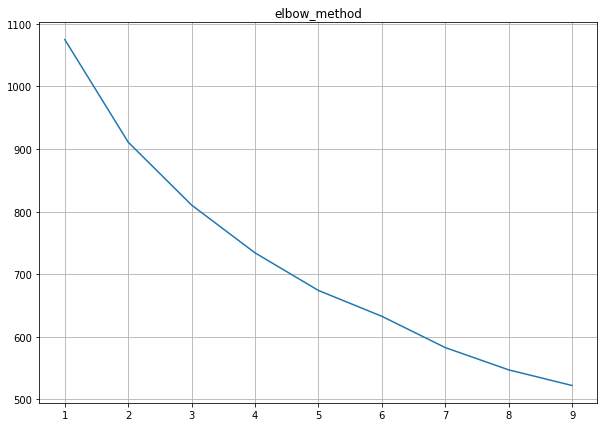

In [72]:
lst = []
for ks in range(1, 10):
    km = KMeans(n_clusters = ks)
    kmeans = km.fit(X_train_scale)
    lst.append(kmeans.inertia_)

fig = plt.figure(figsize = (10, 7))
plt.plot(range(1, 10), lst)
plt.grid(True)
plt.title("elbow_method")

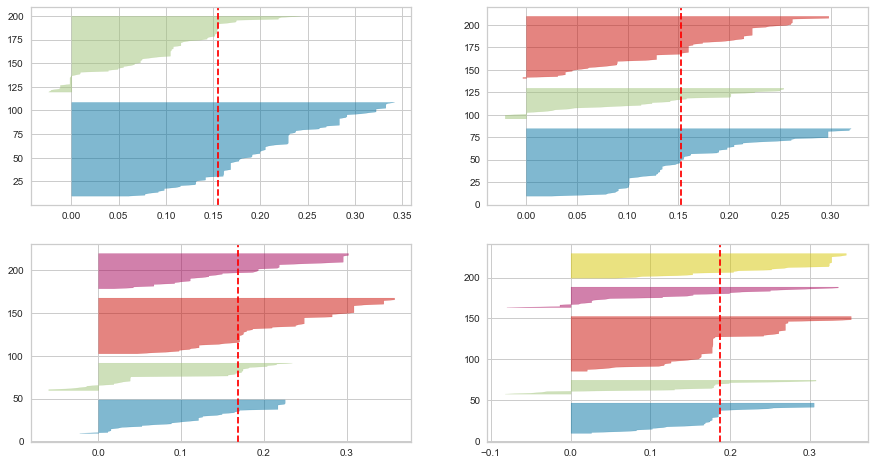

In [74]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_train_scale)

In [86]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k)
neigh_ = neigh.fit(X_train_scale, y_train_scale)
pred_y = neigh_.predict(X_test)
print("Accuracy of model at K = 5 is", metrics.accuracy_score(y_test, pred_y))
# # model_

Accuracy of model at K = 5 is 0.38596491228070173


c:\users\saheed\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [87]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k)
neigh_ = neigh.fit(X_train_scale, y_train_scale)
neigh_

KNeighborsClassifier()

In [88]:
coef_deter = neigh_.score(X_train_scale, y_train_scale)
coef_deter

0.9834254143646409

In [89]:
y_predict = neigh_.predict(X_test_scale)

In [95]:
cf_matrix = confusion_matrix(y_test_scale, y_predict)
cf_matrix

array([[19,  0],
       [ 7, 20]], dtype=int64)

In [98]:
print(confusion_matrix(y_test_scale, y_predict))
print(classification_report(y_test_scale, y_predict))

[[19  0]
 [ 7 20]]
                precision    recall  f1-score   support

    Bankruptcy       0.73      1.00      0.84        19
Non Bankruptcy       1.00      0.74      0.85        27

      accuracy                           0.85        46
     macro avg       0.87      0.87      0.85        46
  weighted avg       0.89      0.85      0.85        46

